In [1]:
from IPython.display import Image

# 회귀 분석으로 연속적 타깃 변수 예측

- 회귀 모델은 연속적인 타깃 변수를 예측하는데 사용되기 때문에 산업 현장의 애플리케이션은 물론 과학 문제를 해결하기 위한 매력적인 도구이다. 
- 변수 간의 관계를 이해하거나 트렌드를 분석하고 날씨를 예측할 수 있다.

### 회귀 모델의 주요 개념과 이번 장에서 다루는 내용
----
- 데이터 탐색과 시각화하기
- 선형 회귀 모델을 구현하는 여러 가지 방법 알아보기
- 이상치에 민감하지 않은 회귀 모델 훈련하기
- 비선형 데이터에 회귀 모델 학습하기

## 10.1 선형 회귀 

선형 회귀는 하나 이상의 특성과 연속적인 타깃 변수 사이의 관계를 모델링하는 것이 목적이다.  
지도 학습의 다른 카테고리인 분류 알고리즘과 달리 회귀는 범주형 클래스 레이블이 아니라 연속적인 출력 값을 예측한다.  


### 10.1.1 단순 선형 회귀

단순 선형 회귀는 하나의 특성과 연속적인 타깃 사이의 관계를 모델링한다.  
특성이 하나인 선형 모델 공식은 ${y=w_0 + w_1 x}$  
여기서 $w_0$는 y축 절편을 나타내고, $w_1$은 특성의 가중치다.  

In [2]:
Image(url='https://git.io/Jts3N', width=500)

위 그림처럼 데이터에 가장 잘 맞는 직선을 회귀 직선이라고 한다.  
회귀 직선과 훈련 샘플 사이의 직선거리를 **오프셋(offset)** 또는 예측 오차인 **잔차(residual)**라고 한다.  

### 10.1.2 다중 선형 회귀

단순 선형 회귀와 다르게 여러 개의 특성이 있는 경우에는 **다중 선형 회귀**라고 한다.  
$y = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \sum_{i=0}^m w_ix_i = w^Tx$  
여기서 y절편은 $w_0$이고, $x_0 = 1$이다.  

----
정적인 이미지로 그려진 다변량 회귀의 초평면은 3차원 산점도만 되어도 이해하기 힘들다.  
산점도에서 2차원 초평면을 시각화하는 좋은 방법은 없기 때문에 이 장에서는 단변량 회귀를 사용하여 하나의 특성을 가진 예제와 그래프를 주로 다룬다.  


## 주택 데이터셋 탐색

1. CRIM      : per capita crime rate by town
2. ZN        : proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     : proportion of non-retail business acres per town
4. CHAS      : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       : nitric oxides concentration (parts per 10 million)
6. RM        : average number of rooms per dwelling
7. AGE       : proportion of owner-occupied units built prior to 1940
8. DIS       : weighted distances to five Boston employment centres
9. RAD       : index of accessibility to radial highways
10. TAX      : full-value property-tax rate per $\$$10,000  
11. PTRATIO  : pupil-teacher ratio by town  
12. B        : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT    : $\%$ lower status of the population  
14. MEDV     : Median value of owner-occupied homes in $1000s  

이 중 MEDV(주택 가격)을 타깃 값으로 삼고, 13개의 특성 중 하나 이상을 사용하여 이 값을 예측한다.  
데이터셋을 더 탐색하기 전에 판다스 DataFrame으로 데이터를 불러온다.  

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 10.2.2 데이터셋의 중요 특징 시각화

**탐색적 데이터 분석**은 머신 러닝 모델을 훈련하기 전에 첫 번째로 수행할 중요하고 권장되는 단계이다.  
다음의 도구들은 이상치를 감지하고 데이터 분포를 시각화 하거나 특성 간의 관계를 나타내는 데 도움이 된다.  

- 산점도 행렬 : 특성간의 상관관계를 한 번에 시작화한다. (MLxtend)

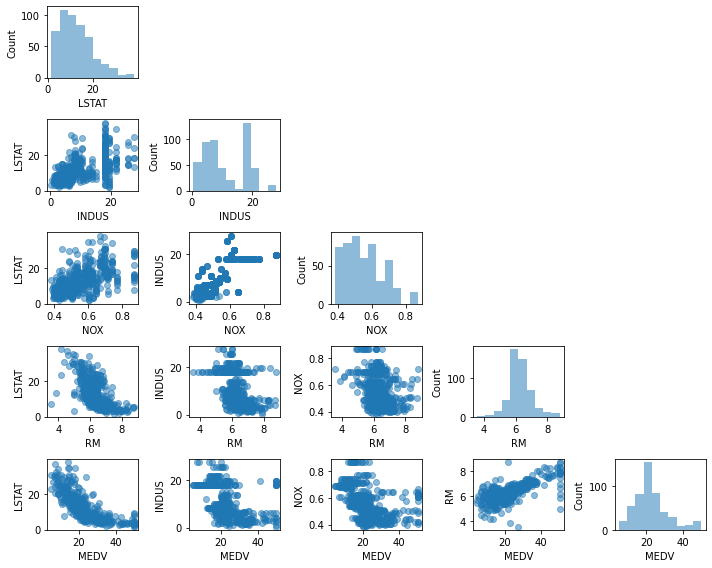

In [6]:
# 산점도 행렬
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

제한된 지면 때문에 한 번에 볼 수 있도록 데이터셋에서 LSTAT, INDUS, NOX, RM, MEDV 다섯 개의 열만 산점도 행렬에 포함시켰다.  
산점도 행렬을 사용하면 데이터가 어떻게 분포되어 있는지, 이상치를 포함하고 있는지 빠르게 확인할 수 있다.  
예를 들어 RM과 MEV 사이에 선형적인 관계가 있다는 것을 알 수 있다.  
또 오른쪽 맨 아래에서 MEDV의 히스토그램을 보면, 이 데이터는 일부 이상치가 있지만 정규 분포 형태를 띠고 있다.  

### 10.2.3 상관관계 행렬을 사용한 분석

- 상관관계 행렬(correlation matrix) : 변수 간의 선형 관계를 정량화하고 요약한다.  
    이는 공분산 행렬에서 스케일 조정된 행렬로 생각하면 된다.

상관관계 행렬은 피어슨의 상관관계 계수를 포함하고 있는 정방 행렬이다. (피어슨의 $r$)  
범위는 -1 ~ 1로 1인경우 두 특성이 완벽한 양의 상관관계를, 0인 경우 아무런 상관관계가 없음을, -1인 경우 완벽한 음의 상관관계를 가진다.  
$r =$$ {\sigma _{xy}}\over{\sigma_x \sigma_y}$

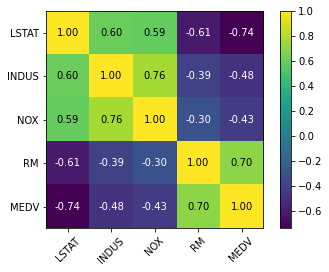

In [7]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

선형 회귀 모델을 훈련하려면 타깃 변수 MEDV와 상관관계가 높은 특성이 좋다.  
이 상관관계 행렬을 살펴보면 타깃 변수 MEDV가 LSTAT와 상관관계가 높다. 핮미나, 산점도 행렬에서는 둘 사이의 관계는 비선형적이었다.  
그래서 상관관계와 선점도를 모두 고려하여 RM이 선형관계를 설명하기 좋은 특성임을 알 수 있다.  

## 10.3 최소 제곱 선형 회귀 모델 구현

**최소 제곱법**을 사용하여 훈련 샘플에 잘 맞는 직선을 찾는 방법을 알아보자.  
이 방법은 훈련 샘플까지 수직거리(잔차)의 제곱합을 최소화하는 선형 회귀 직선의 모델 파라미터를 추정하는 방법이다.  

### 10.3.1 경사 하강법으로 회귀 모델의 파라미터 구하기

$J(w) = \frac1 2 \sum_{i=1}^n {(y^{(i)}-\hat y ^{(i)})^2}$  
여기서 $\hat y$는 $w^Tx$이다.  
근본적으로 OLS(최소자승법)은 단위 계단 함수가 없는 아달린으로 해석할 수 있다.  

In [8]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [9]:
# 데이터 전처리를 위한 값 불러오기
X = df[['RM']].values
y = df['MEDV'].values

# 정규화
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [10]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

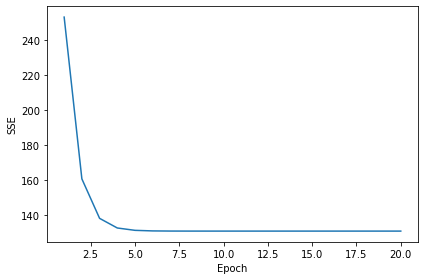

In [11]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

에포크가 5일때 수렴한다는 것을 확인할 수 있다.

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

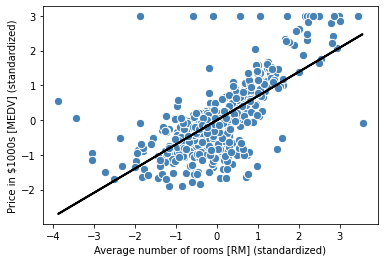

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

방 개수가 주택 가격을 잘 설명하지 못하는 경우도 많다는 것을 알려준다.

In [19]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


In [35]:
# invers_transform을 이용해 원래 단위로 되돌리기
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)

print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(1, -1)))

$1,000 단위 가격: 10.840


### 10.3.2 사이킷런으로 회귀 모델의 가중치 추정

실전에서는 더 효율적인 구현이 필요하다.  
예를 들어 회귀를 위한 사이킷런의 추정기 SciPy의 최소 제곱 구현(scipy.linalg.lstsq)을 사용한다.  
사이킷런의 선형 회귀 구현은 표준화되지 않은 특성에 더 잘 동작한다.  


In [38]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


사이킷런의 선형회귀는 표준화되지 않은 RM과 MEDV 변수에 훈련시키면 특성이 표준화되지 않았기 때문에 모델의 가중치가 달라진다.  


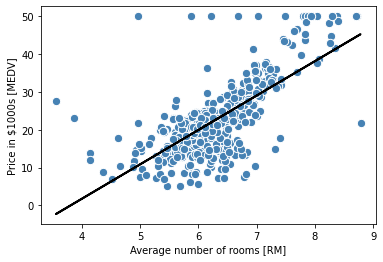

In [40]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

- 선형 회귀를 푸는 해석적 방법
머신 러닝 모델의 대안으로는 연립 일차 방정식으로 OLS 문제를 푸는 정규 방정식이 있다. 이 공식은 아래와 같다.
$$w = (X^T X)^{-1} X^T y$$

In [41]:
# 1로 채워진 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


- QR 분해는 실수 행렬을 직교행렬(orthogonal matrix) Q와 상삼각 행렬 (upper triangular matrix) R의 곱으로 표현하는 행렬 분해 방법이다.  
$$w = X^{-1}y = (QR)^{-1}y = R^{-1}Q^{-1}y = R^{-1}Q^{T}y$$

In [42]:
Q, R = np.linalg.qr(Xb)
w = np.dot(np.linalg.inv(R), np.dot(Q.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


## x^+ (유사 역행렬)에 대한 부분 이해 X..

## 10.4 RANSAC을 사용하여 안정된 회귀 모델 훈련

선형 회귀 모델은 이상치에 크게 영향을 받을 수 있다.  
어떤 상황에서는 데이터의 아주 작은 일부분이 추정 모델의 가중치에 큰 영향을 끼친다.  
이상치를 제거하려면 항상 해당 분야의 지식뿐 아니라 데이터 과학자로서 식견도 필요하다.  

이상치를 제거하는 방식 대신 RANSAC(RANdom SAmple Consensus) 알고리즘을 사용하는 안정된 회귀 모델에 대해 알아본다.  
이 알고리즘은 정상치라는 일부 데이터로 회귀 모델을 훈련한다.  

1. 랜덤하게 일부 샘플을 정상치로 선택하여 모델을 훈련한다.  
2. 훈련된 모델에서 다른 모든 포인트를 테스트한다. 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가한다.  
3. 모든 정상치를 사용하여 모델을 다시 훈련한다.  
4. 훈련된 모델과 정상치 간의 오차를 추정한다.  
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘을 종료한다. 그렇지 않으면 1로 돌아간다.  


C:\Users\chang\anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


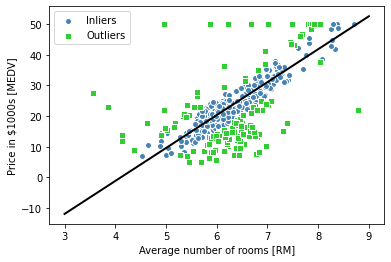

In [43]:
from sklearn.linear_model import RANSACRegressor

# 사이킷런의 RANSAC 모델
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # 최대 반복 횟수
                         min_samples=50, # 랜덤하게 선택할 샘플의 최소 개수
                         loss='absolute_loss', # 수직 거리의 절댓값을 계산
                         residual_threshold=5.0, # 거리가 5이내인 정상 샘플만 포함
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [44]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


## 10.5 선형 회귀 모델의 성능 평가

학습된 모델이 훈련 데이터셋에 편향되지는 않았는지 확인을 해야한다.  
여기서는 간단한 회귀 모델 대신에 데이터셋에 있는 모든 변수를 사용하여 다변량 회귀 모델을 훈련한다.  


In [45]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

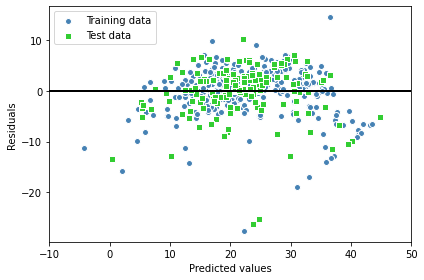

In [46]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

좋은 회귀 모델이라면 오차가 랜덤하게 분포되고 잔차는 중앙선 주변으로 랜덤하게 흩어져야한다.  
잔차 그래프에 패턴이 나타나면 특성에서 어떤 정보를 잡아내지 못하고 잔차로 새어나갔다고 말한다.  

모델 성능을 정량적으로 측정하는 또 다른 방법은 평균 제곱 오차(Mean Squared Error)이다.  
이 값은 선형 회귀 모델을 훈련하기 위해 최소화 하는 제곱 오차합의 평균(SSE)입니다.  
$$MSE = \frac1n \sum_{i=1}^n(y^{(1)}-\hat y^{(1)})^2$$

In [47]:
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673


훈련 데이터셋의 MSE가 19.96이고, 테스트 데이터셋의 MSE는 27.20으로 훨씬 크다.  
이는 모델이 과적합 되었다는 신호이다. 하지만, MSE는 값의 제한이 없다.  

따라서 결정계수($R^2$)가 더 유용하다. 결정 계수는 모델 성능을 잘 해석하기 위해 만든 MSE의 표준화된 버전으로 생각할 수 있다.  
$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac {MSE}{Var(y)}$$  

In [48]:
from sklearn.metrics import r2_score
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 R^2: 0.765, 테스트 R^2: 0.673


## 10.6 회귀에 규제 적용

규제는 부가 정보를 손실에 더해 과대적합 문제를 방지하는 한 방법이다.  
복잡도에 의한 패널티를 유도하여 모델 파라미터의 값을 감소시킨다.  
가장 널리 사용하는 선형 회귀 규제 방법은 **릿지 회귀**, **라쏘**,**엘라스틱 넷**이다.  
- 릿지(Ridge Regression)은 단순히 최소 제곱 비용함수에 가중치의 제곱합을 추가한 L2 규제 모델이다.  
    $J(w)_{Ridge} = \frac1 2 \sum_{i=1}^n {(y^{(i)}-\hat y ^{(i)})^2} + \lambda ||w||^2_2$  
    $L2 : \lambda ||w||^2_2 = \lambda \sum ^m _{j=1} w_j^2$  
   하이퍼파라미터 $\lambda$를 증가시키면 규제의 강도가 증가되고 가중치 값이 감소한다.
- 라쏘(Least Absolute Shinkage and Selection Operator) : 희소한 모델을 만들 수 있다.  규제 강도에 따라서 어떤 가중치는 0이 된다.  
    $J(w)_{LASSO} = \frac1 2 \sum_{i=1}^n {(y^{(i)}-\hat y ^{(i)})^2} + \lambda ||w||_1$  
    $L1 : \lambda ||w||_1 = \lambda \sum ^m _{j=1} |w_j|$  
    라쏘는 특성 선택 기법으로 사용할 수 있다 라쏘는 m > n 일때 n개의 특성을 선택하는 것이 한계이다.  
- 엘라스틱 넷 : 희소한 모델을 만들기 위한 L1 패널티와 m>n일 때 n보다 많은 특성을 선택할 수 있는 L2 패널티를 가진다.  
    $J(w)_{LASSO} = \frac1 2 \sum_{i=1}^n {(y^{(i)}-\hat y ^{(i)})^2} + \lambda_1 w_j^2 + \lambda_2 |w_j|$  

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [50]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [53]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

## 10.7 선형 회귀 모델을 다항 회귀로 변환

선형 가정이 어긋날 때 대처할 수 있는 한 가지 방법이 다항식 항을 추가한 다항 회귀 모델을 사용하는 것이다.  
$$y = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d$$ 여기서 d는 다항식의 차수를 나타낸다.  


### 10.7.1 사이킷런을 사용하여 다항식 항 추가

1. 이차 다항식 항을 추가한다.  
2. 비교를 위해 평범한 선형 회귀 모델을 훈련한다.
3. 다항 회귀를 위해 변환된 특성에서 다변량 회귀 모델을 훈련한다.
4. 결과 그래프를 그린다.

In [54]:
# 1. 이차 다항식 항을 추가한다.  
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [56]:
# 2. 비교를 위해 평범한 선형 회귀 모델을 훈련한다.

lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [57]:
# 3. 다항 회귀를 위해 변환된 특성에서 다변량 회귀 모델을 훈련한다.
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

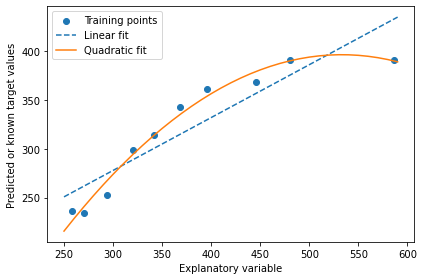

In [58]:
# 4. 결과 그래프를 그린다.

plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [59]:
# 평가 지표 계산
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


### 10.7.2 주택 데이터셋을 사용한 비선형 관계 모델링

이차 다항식과 삼차 다항식을 사용하여 주택 가격과 LSTAT 사이의 관계를 모델링한다.  

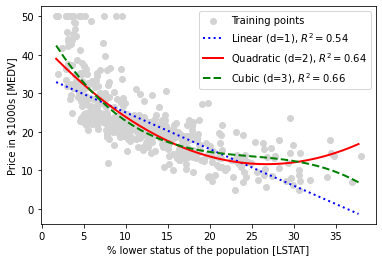

In [60]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

그래프에서 볼 수 있듯이 이차 다항 모델보다 삼차 다항 모델이 주택 가격과 LSTAT 사이의 관계를 잘 잡아냈다.  
다항 특성을 많이 추가할수록 모델 복잡도가 높아지고 과대적합의 가능성이 증가한다.  

---
두 변수 사이의 관계는 지수 함수와 매우 비슷할 것이다.  
따라서 로그를 취하면 직선이 되므로 로그 변환을 적용해도 좋을 것이다.

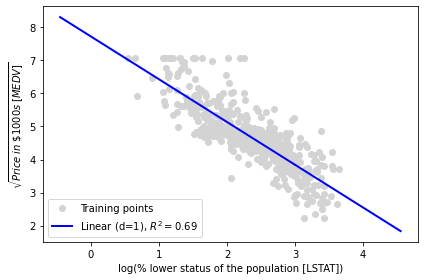

In [61]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 특성을 변환합니다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## 10.8 랜덤 포레스트를 사용하여 비선형 관계 다루기

랜덤 포레스트 회귀는 다른 회귀 모델과는 개념적으로 다르다.  
여러 개의 결정 트리를 앙상블한 랜덤 포레스트는 앞서 언급한 선형이나 다항 회귀 모델과 다르게 개별 선형 함수의 합으로 이해할 수 있다.   

### 10.8.1 결정 트리 회귀

